**SECTION I**

**Import Library**

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


**Import The Dataset**

In [38]:
df= pd.read_excel('/content/drive/MyDrive/RetailPulseAssignmentData.xlsx', sheet_name=None)

In [39]:
df

{'Year 2009-2010':        Invoice StockCode  ... Customer ID         Country
 0       489434     85048  ...     13085.0  United Kingdom
 1       489434    79323P  ...     13085.0  United Kingdom
 2       489434    79323W  ...     13085.0  United Kingdom
 3       489434     22041  ...     13085.0  United Kingdom
 4       489434     21232  ...     13085.0  United Kingdom
 ...        ...       ...  ...         ...             ...
 525456  538171     22271  ...     17530.0  United Kingdom
 525457  538171     22750  ...     17530.0  United Kingdom
 525458  538171     22751  ...     17530.0  United Kingdom
 525459  538171     20970  ...     17530.0  United Kingdom
 525460  538171     21931  ...     17530.0  United Kingdom
 
 [525461 rows x 8 columns],
 'Year 2010-2011':        Invoice StockCode  ... Customer ID         Country
 0       536365    85123A  ...     17850.0  United Kingdom
 1       536365     71053  ...     17850.0  United Kingdom
 2       536365    84406B  ...     17850.0  Unite

**JOining Both the dataset**

In [40]:
df_new=pd.concat(df.values())

In [99]:
df_new.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Total_Amount,Month,Month_Year
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4,12,2009=12
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,12,2009=12
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,12,2009=12
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8,12,2009=12
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0,12,2009=12


**Chech the size of dataset**

In [42]:
df_new.shape

(1067371, 8)

**Look more info about the dataset**

In [43]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1067371 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Invoice      1067371 non-null  object        
 1   StockCode    1067371 non-null  object        
 2   Description  1062989 non-null  object        
 3   Quantity     1067371 non-null  int64         
 4   InvoiceDate  1067371 non-null  datetime64[ns]
 5   Price        1067371 non-null  float64       
 6   Customer ID  824364 non-null   float64       
 7   Country      1067371 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 73.3+ MB


**Customer distribution by country**

In [44]:
country_cust_data=df_new[['Country','Customer ID']].drop_duplicates()
country_cust_data.groupby(['Country'])['Customer ID'].aggregate('count').reset_index().sort_values('Customer ID', ascending=False)

,Country,Customer ID
40,United Kingdom,5410
15,Germany,107
14,France,95
34,Spain,41
3,Belgium,29
30,Portugal,24
26,Netherlands,23
36,Switzerland,22
35,Sweden,19
20,Italy,17


**Check for missing values in the dataset**

In [45]:
df_new.isnull().sum(axis=0)

Invoice             0
StockCode           0
Description      4382
Quantity            0
InvoiceDate         0
Price               0
Customer ID    243007
Country             0
dtype: int64

**Remove missing values from CustomerID column, can ignore missing values in description column**

In [46]:
df_new = df_new[pd.notnull(df_new['Customer ID'])]

**Validate if there are any negative values in Quantity column**

In [47]:
df_new.Quantity.min()

-80995

**Chech there are any negative values in Unit Price column**

In [48]:
df_new.Price.min()

0.0

**Filter out records with negative values**

In [49]:
df_new= df_new[(df_new['Quantity']>0)]

**Convert the string date field to datetime**

In [50]:
df_new['InvoiceDate'] = pd.to_datetime(df_new['InvoiceDate'])

**Add new column depicting total amount**

In [51]:
df_new['Total_Amount'] = df_new['Quantity'] * df_new['Price']

**Check the shape (number of columns and rows) in the dataset after data is cleaned**

In [52]:
df_new.shape

(805620, 9)

**Check null value after cleaning the dataset**

In [53]:
df_new.isnull().sum(axis=0)

Invoice         0
StockCode       0
Description     0
Quantity        0
InvoiceDate     0
Price           0
Customer ID     0
Country         0
Total_Amount    0
dtype: int64

In [54]:
df_new.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Total_Amount
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0


**Group by Customer and Total_amount and find the customer wise purchasing Amountt**

In [55]:
customer_wise_total_Amount_df = df_new[['Customer ID', 'Total_Amount']].groupby('Customer ID', as_index = False).sum()
customer_wise_total_Amount_df.rename(columns = {'Total_Amount' : 'Monetary'}, inplace = True)
customer_wise_total_Amount_df

,Customer ID,Monetary
0,12346.0,77556.46
1,12347.0,5633.32
2,12348.0,2019.40
3,12349.0,4428.69
4,12350.0,334.40
...,...,...
5876,18283.0,2736.65
5877,18284.0,461.68
5878,18285.0,427.00
5879,18286.0,1296.43


**Check Customer wise purchasing frequency**

In [56]:
customer_wise_purchases_frequency_df =  df_new[['Customer ID', 'Invoice']].groupby('Customer ID', as_index = False).count()
customer_wise_purchases_frequency_df.rename(columns = {'Invoice': 'Frequency'}, inplace = True)
customer_wise_purchases_frequency_df

,Customer ID,Frequency
0,12346.0,34
1,12347.0,253
2,12348.0,51
3,12349.0,175
4,12350.0,17
...,...,...
5876,18283.0,986
5877,18284.0,28
5878,18285.0,12
5879,18286.0,67


**Merge both frequency and Monetory columns with customer id**

In [57]:
merged_df = customer_wise_total_Amount_df.merge(customer_wise_purchases_frequency_df, on = "Customer ID", how = "inner")
merged_df

,Customer ID,Monetary,Frequency
0,12346.0,77556.46,34
1,12347.0,5633.32,253
2,12348.0,2019.40,51
3,12349.0,4428.69,175
4,12350.0,334.40,17
...,...,...,...
5876,18283.0,2736.65,986
5877,18284.0,461.68,28
5878,18285.0,427.00,12
5879,18286.0,1296.43,67


**Finding Last purchasing date**

In [58]:
last_purchase_df = df_new[['Customer ID', 'InvoiceDate']].groupby('Customer ID', as_index = False).max()
last_purchase_df.rename(columns = {'InvoiceDate': 'Last_Purchase_Date'}, inplace = True)
last_purchase_df

,Customer ID,Last_Purchase_Date
0,12346.0,2011-01-18 10:01:00
1,12347.0,2011-12-07 15:52:00
2,12348.0,2011-09-25 13:13:00
3,12349.0,2011-11-21 09:51:00
4,12350.0,2011-02-02 16:01:00
...,...,...
5876,18283.0,2011-12-06 12:02:00
5877,18284.0,2010-10-04 11:33:00
5878,18285.0,2010-02-17 10:24:00
5879,18286.0,2010-08-20 11:57:00


**Difference of days b/w Invice date and last purchasing date in terms of date**

In [59]:
days_since_last_purchase = df_new['InvoiceDate'].max() - last_purchase_df['Last_Purchase_Date'] 
days_since_last_purchase = days_since_last_purchase + pd.Timedelta("1 days")
days_since_last_purchase

0      326 days 02:49:00
1        2 days 20:58:00
2       75 days 23:37:00
3       19 days 02:59:00
4      310 days 20:49:00
              ...       
5876     4 days 00:48:00
5877   432 days 01:17:00
5878   661 days 02:26:00
5879   477 days 00:53:00
5880    43 days 03:21:00
Name: Last_Purchase_Date, Length: 5881, dtype: timedelta64[ns]

In [60]:
time_diff_in_days = pd.Series(data = [d.days for d in days_since_last_purchase], index = merged_df.index)
time_diff_in_days

0       326
1         2
2        75
3        19
4       310
       ... 
5876      4
5877    432
5878    661
5879    477
5880     43
Length: 5881, dtype: int64

**Merge Recency columns**

In [61]:
merged_df['Recency'] = time_diff_in_days
merged_df.head()

,Customer ID,Monetary,Frequency,Recency
0,12346.0,77556.46,34,326
1,12347.0,5633.32,253,2
2,12348.0,2019.40,51,75
3,12349.0,4428.69,175,19
4,12350.0,334.40,17,310


**Chech null value**

In [62]:
merged_df.isnull().sum()

Customer ID    0
Monetary       0
Frequency      0
Recency        0
dtype: int64

**Frequency Statistics**

In [63]:
merged_df.Frequency.describe()

count     5881.000000
mean       136.986907
std        353.779018
min          1.000000
25%         21.000000
50%         53.000000
75%        142.000000
max      12890.000000
Name: Frequency, dtype: float64


**Frequency distribution plot**

In [64]:
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


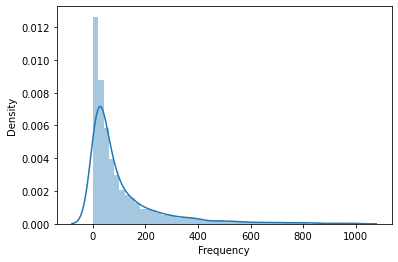

In [65]:
#Frequency distribution plot, taking observations which have frequency less than 1000
x = merged_df.query('Frequency < 1000')['Frequency']

ax = sns.distplot(x)

**Descriptive Statistics (Monetary)**

In [66]:
merged_df.Monetary.describe()

count      5881.000000
mean       3017.076888
std       14734.128619
min           0.000000
25%         347.800000
50%         897.620000
75%        2304.180000
max      608821.650000
Name: Monetary, dtype: float64

**Recency Statistics**

In [67]:
merged_df.Recency.describe()

count    5881.000000
mean      201.457745
std       209.474135
min         1.000000
25%        26.000000
50%        96.000000
75%       380.000000
max       739.000000
Name: Recency, dtype: float64

**Monateray distribution Plot**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


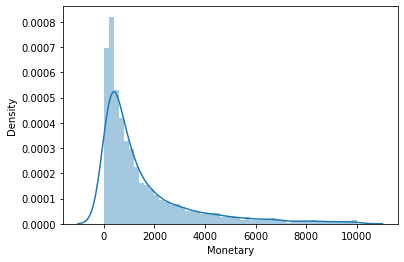

In [69]:
#Monateray distribution plot, taking observations which have monetary value less than 10000
x = merged_df.query('Monetary < 10000')['Monetary']

ax = sns.distplot(x)

**Recency distribution plot**

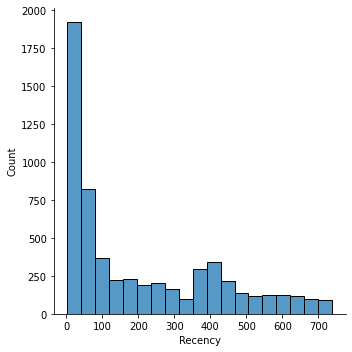

In [70]:
x = merged_df['Recency']

ax = sns.displot(x)

**Split into 4 segments using quantiles**

In [71]:
quantiles = merged_df.quantile(q=[0.25,0.50,0.75])
quantiles = quantiles.to_dict()

In [72]:
quantiles

{'Customer ID': {0.25: 13833.0, 0.5: 15313.0, 0.75: 16797.0},
 'Frequency': {0.25: 21.0, 0.5: 53.0, 0.75: 142.0},
 'Monetary': {0.25: 347.8, 0.5: 897.6200000000003, 0.75: 2304.1799999999994},
 'Recency': {0.25: 26.0, 0.5: 96.0, 0.75: 380.0}}

**Functions to create R, F and M segments**

In [73]:
#RScoring
def RScoring(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4

In [74]:
#FScoring    
def FnMScoring(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1

**Calculate and Add R, F and M segment value columns in the existing dataset to show R, F and M segment values**

In [75]:
merged_df['R'] = merged_df['Recency'].apply(RScoring, args=('Recency',quantiles,))
merged_df['F'] = merged_df['Frequency'].apply(FnMScoring, args=('Frequency',quantiles,))
merged_df['M'] = merged_df['Monetary'].apply(FnMScoring, args=('Monetary',quantiles,))

In [76]:
merged_df.head()

,Customer ID,Monetary,Frequency,Recency,R,F,M
0,12346.0,77556.46,34,326,3,3,1
1,12347.0,5633.32,253,2,1,1,1
2,12348.0,2019.40,51,75,2,3,2
3,12349.0,4428.69,175,19,1,1,1
4,12350.0,334.40,17,310,3,4,4


**Calculate and Add RFM Group value column showing combined concatenated score of RFM**

In [77]:
merged_df['RFMGroup'] = merged_df.R.map(str) + merged_df.F.map(str) + merged_df.M.map(str)

#Calculate and Add RFMScore value column showing total sum of RFMGroup values
merged_df['RFMScore'] = merged_df[['R', 'F', 'M']].sum(axis = 1)
merged_df.head()

,Customer ID,Monetary,Frequency,Recency,R,F,M,RFMGroup,RFMScore
0,12346.0,77556.46,34,326,3,3,1,331,7
1,12347.0,5633.32,253,2,1,1,1,111,3
2,12348.0,2019.40,51,75,2,3,2,232,7
3,12349.0,4428.69,175,19,1,1,1,111,3
4,12350.0,334.40,17,310,3,4,4,344,11


In [98]:
merged_df.sort_values(by=['RFMGroup'])

,Customer ID,Monetary,Frequency,Recency,R,F,M,RFMGroup,RFMScore,RFM_Loyalty_Level
1283,13644.0,2624.26,146,16,1,1,1,111,3,Platinum
2658,15031.0,3156.58,405,4,1,1,1,111,3,Platinum
493,12841.0,7540.68,702,5,1,1,1,111,3,Platinum
5259,17663.0,5175.83,238,26,1,1,1,111,3,Platinum
2651,15024.0,4075.51,371,10,1,1,1,111,3,Platinum
...,...,...,...,...,...,...,...,...,...,...
620,12969.0,122.45,5,603,4,4,4,444,12,Bronze
3001,15375.0,60.96,6,690,4,4,4,444,12,Bronze
2536,14906.0,68.44,1,445,4,4,4,444,12,Bronze
585,12934.0,181.65,2,737,4,4,4,444,12,Bronze


**Assign Loyalty Level to each customer**

In [78]:
Loyalty_Level = ['Platinum', 'Gold', 'Silver', 'Bronze']
Score_cuts = pd.qcut(merged_df.RFMScore, q = 4, labels = Loyalty_Level)
merged_df['RFM_Loyalty_Level'] = Score_cuts.values
merged_df.reset_index().head()

,index,Customer ID,Monetary,Frequency,Recency,R,F,M,RFMGroup,RFMScore,RFM_Loyalty_Level
0,0,12346.0,77556.46,34,326,3,3,1,331,7,Gold
1,1,12347.0,5633.32,253,2,1,1,1,111,3,Platinum
2,2,12348.0,2019.40,51,75,2,3,2,232,7,Gold
3,3,12349.0,4428.69,175,19,1,1,1,111,3,Platinum
4,4,12350.0,334.40,17,310,3,4,4,344,11,Bronze


**Validate the data for RFMGroup = 331**

In [79]:
merged_df[merged_df['RFMGroup']=='331'].sort_values('Monetary', ascending=False).reset_index().head()

,index,Customer ID,Monetary,Frequency,Recency,R,F,M,RFMGroup,RFMScore,RFM_Loyalty_Level
0,0,12346.0,77556.46,34,326,3,3,1,331,7,Gold
1,631,12980.0,16245.78,52,158,3,3,1,331,7,Gold
2,1681,14045.0,11313.03,39,109,3,3,1,331,7,Gold
3,296,12643.0,8350.42,52,128,3,3,1,331,7,Gold
4,568,12917.0,4359.20,50,128,3,3,1,331,7,Gold


**Plot 3-D presentation of RFM Loyalty level**

In [81]:
import plotly.express as px
plotly_fig2 = px.scatter_3d(merged_df, x = 'Monetary', y = 'Frequency', z = 'Recency', color = 'RFM_Loyalty_Level')
plotly_fig2.show()

In [82]:
df_new.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Total_Amount
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0


**3. What is the most popular time of year based on this sales data?**

In [83]:
df_new.head(5)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Total_Amount
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0


**Add month column in dataset**

In [84]:
df_new['Month']=df_new['InvoiceDate'].dt.month

In [85]:
df_new.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Total_Amount,Month
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4,12
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,12
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,12
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8,12
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0,12


**Merge total amount with month**

In [86]:
df_new.groupby('Month')['Total_Amount'].sum()

Month
1     1126764.102
2      953508.416
3     1295109.751
4     1063809.553
5     1278580.350
6     1300280.270
7     1191727.751
8     1249586.550
9     1784453.383
10    2075998.790
11    2334153.422
12    2089456.840
Name: Total_Amount, dtype: float64

**Plot hist graph of sales**

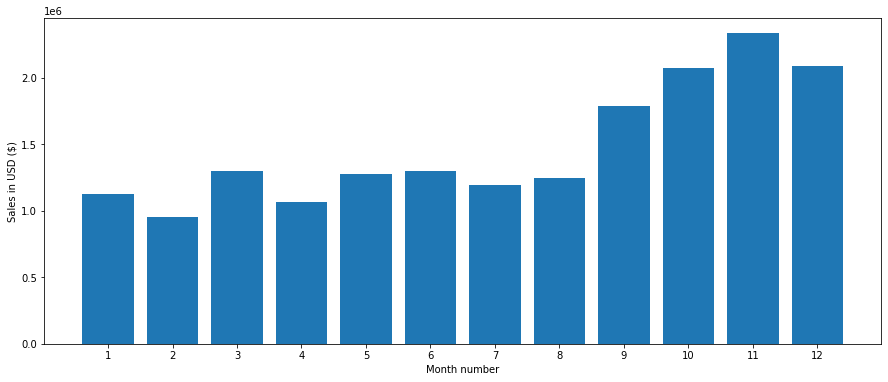

In [87]:
months=range(1,13)
plt.figure(figsize=(15,6))
plt.bar(months,df_new.groupby('Month')['Total_Amount'].sum())
plt.xticks(months)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month number')
plt.show()

From September to December is the highest sales 

**4. Is there any seasonality in data? Explain with supportive evidence.**

In [102]:
df_new['Year_Month']= df_new['InvoiceDate'].apply(lambda x: x.strftime('%Y-%m'))
df_new.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Total_Amount,Month,Month_Year,Year_Month
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4,12,2009-12,2009-12
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,12,2009-12,2009-12
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,12,2009-12,2009-12
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8,12,2009-12,2009-12
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0,12,2009-12,2009-12


**Group total amount with month_year wise to check the trends in dataset**

In [89]:
df_sesonality = df_new.groupby('Month_Year').sum()['Total_Amount'].reset_index()

In [90]:
df_sesonality.head()

,Month_Year,Total_Amount
0,2009=12,686654.160
1,2010=01,557319.062
2,2010=02,506371.066
3,2010=03,699608.991
4,2010=04,594609.192


**Plot time series graph with reflect the sesonality in dataset**

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24],
 <a list of 25 Text major ticklabel objects>)

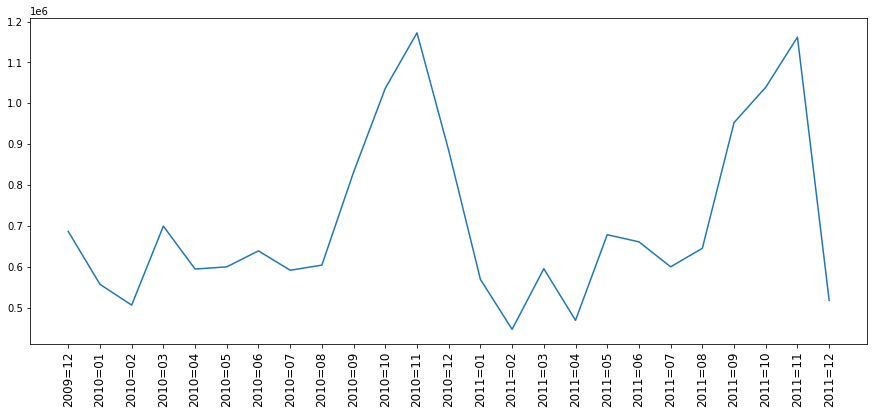

In [91]:
plt.figure(figsize=(15,6))
plt.plot(df_sesonality['Month_Year'],df_sesonality['Total_Amount'])
plt.xticks(rotation= 'vertical',size=12)

Seens highest sales every year from Septamber to December 

**5. Discuss customer's lifetime with respect to the given dataset.**

In [92]:
df_clv=pd.concat(df.values())

In [93]:
df_clv.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


Remove time from date

In [94]:
df_clv['InvoiceDate'] = pd.to_datetime(df_clv['InvoiceDate'], format="%Y/%m/%d %H:%M").dt.date

#There are 135,080 missing values in the CustomerID column, and since our analysis is based on customers, 
#we will remove these missing values.
df_clv = df_clv[pd.notnull(df_clv['Customer ID'])]

#Keep records with non negative quantity
df_clv = df_clv[(df_clv['Quantity']>0)]

#Add a new column depicting total sales
df_clv['Total_Sales'] = df_clv['Quantity'] * df_clv['Price']
necessary_cols = ['Customer ID', 'InvoiceDate', 'Total_Sales']
df_clv = df_clv[necessary_cols]
df_clv.head()

,Customer ID,InvoiceDate,Total_Sales
0,13085.0,2009-12-01,83.4
1,13085.0,2009-12-01,81.0
2,13085.0,2009-12-01,81.0
3,13085.0,2009-12-01,100.8
4,13085.0,2009-12-01,30.0


Check the Last order date

In [95]:
last_order_date = df_clv['InvoiceDate'].max()
print(last_order_date)
print("--------------------------------------")
print(df_clv[(df_clv['Customer ID']==12346)])

2011-12-09
--------------------------------------
        Customer ID InvoiceDate  Total_Sales
27994       12346.0  2009-12-14        45.00
28251       12346.0  2009-12-14        22.50
28254       12346.0  2009-12-14        22.50
39398       12346.0  2009-12-18        22.50
39411       12346.0  2009-12-18         1.00
45228       12346.0  2010-01-04        22.50
45230       12346.0  2010-01-04        22.50
56117       12346.0  2010-01-14        22.50
66084       12346.0  2010-01-22        22.50
107800      12346.0  2010-03-02         3.25
107801      12346.0  2010-03-02         5.95
107802      12346.0  2010-03-02         5.95
107803      12346.0  2010-03-02         5.95
107804      12346.0  2010-03-02         5.95
253028      12346.0  2010-06-28         7.49
253029      12346.0  2010-06-28         7.49
253030      12346.0  2010-06-28         7.49
253031      12346.0  2010-06-28         7.49
253032      12346.0  2010-06-28         7.49
253033      12346.0  2010-06-28         7.49
25303

Customer Lifetime Value which depicts measure of the average customer's revenue generated over their entire relationship with a company. And this is done by categorizing customers in 4 groups. According to this dataset we have large number of those customer who generated more revenue and are more loyal.